In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Что такое искусственный нейрон?

Икусственный нейрон - это всего лишь комбинация математических операций. Вектор чисел (входные данные) умножатеся на вектор коэффициентов (имено они как раз и "обучаются"); их произведения суммируются и поступают на вход функции активации, которая трансформируется в результат.

![alt text](https://drive.google.com/uc?id=1yFPLGhmGgBQ-pxEtWqw_3YemSwlFU-XT)

Обобщенная формула искусственного, получается, выглядит следующим образом:
$$y = f(\sum_{i=1}^n x_i*w_i + b)$$

В качестве функции активации может выстпать любая функция. До недавнего широкого распространения свёрточных нейронных сетей наиболее часто использовалась сигмоида. Сейчас - так называемая RELU-функция. Мы на данном вебинаре реализуем в первую очередь сигмоиду (она показана на картинке). Но код легко будет заменить на любой необходимый.

![Сигмоида](https://python-scripts.com/wp-content/uploads/2019/10/neural-networks-10.jpg)

Формула функции сигмоиды: $$y = \frac{1}{(1+e^{-x})}$$

# Создаём свой нейрон

In [ ]:
# определеним функцию (в языке программирования) для вычислени значения функции (математика) с использованием формулы сигмоиды

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
# создаём класс для нейрона

class Neuron:

# в конструктор передаём значения весов и смещения
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

#создаём метод класса для описания процедуры прямого прохождения сигнала
    def feedforward(self, inputs):
        #np.dot обеспечивает перемножение векторов
        result = np.dot(self.weights, inputs) + self.bias
        return sigmoid(result)

In [ ]:
# посмотрим простой пример w1 = 0, w2 = 1, b = 1

weights = np.array([1, 1])
bias = 1

#создаём нейрон, активируем конструктор
n = Neuron(weights, bias)

#заданим входные данные Х - x1 = 1, x2 = 1

x = np.array([1, 1])
print(n.feedforward(x))
print((1/(1+np.exp(-3))))

0.9525741268224334
0.9525741268224334


# Что такой нейронная сеть?

Нейронная сеть - группа связанных между собой нейронов. Классические сети - полносязные. Бывают и другие. Есть три типа слоёв:

*   Входной - принимает на вход сигналы
*   Скрытые - "рабочие" слои, преобразуют входные данные в выходные
*   Выходной - позволяет считать результат

Количество нейроннов в каждом слое зависит от желания "автора" той или иной сети.

Мы будем делать очень простую сетку - она на вход будет принимать две сигнала и сразу передавать результат обработки на выход.

![alt text](https://drive.google.com/uc?id=1ooVWuapuohvaAvvOa_MGfKRdDy4NA8Ta)



# Создаём свою нейросеть

In [ ]:
class NeuralNetwork:

# создаём констурктор для класса нейросети
# пока что все нейронны имеют одинаковые параметры
    def __init__(self):
        weights = np.array([0, 1])
        bias = 0

        # Класс Neuron из предыдущего раздела
        self.n1 = Neuron(weights, bias)
        self.n2 = Neuron(weights, bias)
        self.o1 = Neuron(weights, bias)

    def feedforward(self, x):
        #считаем результат для первого нейрона
        out_n1 = self.n1.feedforward(x)
        #считаем результат для второго нейрона
        out_n2 = self.n2.feedforward(x)

        # Входы для о являются выводами h1 и h2
        out_o = self.o1.feedforward(np.array([out_n1, out_n2]))

        return out_o

In [ ]:
network = NeuralNetwork()
x = np.array([2, 3])
print(network.feedforward(x))  # 0.7216325609518421
print((1/(1+np.exp(-3)))) # n1 и n2
print((1/(1+np.exp(-0.952574)))) # o

0.7216325609518421
0.9525741268224334
0.7216325354758769


# Создать мало - нужно тренировать. Считаем точность

Создать нейронную сеть не досаточно. Необходимо подобрать такие значения коэффициентов и смещения, которые ползволят добиться наиболее точных результатов.

Для начала разберём, как посчитать точность результатов.

Предположим, что есть текущие результаты, предсказанные нейронной сетью $y_{pred}$ и истинные значения $y_{true}$. Известный способ подсчитать ошибку - сумма квадратов отклонений.

$$MSE = (y_{true}-y_{pred})^{2} / n $$

Для понимания можно посомтреть график.

![alt text](https://drive.google.com/uc?id=1y6Rbh9Pn7q8J78dy0wnjN5uaCeDfWs0q)

Основная задача при обучении - минимизировать эту сумму.


In [ ]:
def mse_loss(y_true, y_pred):
    # y_true и y_pred являются массивами numpy с одинаковой длиной
    return ((y_true - y_pred) ** 2).mean()

In [ ]:
# для примера

y_true = np.array([1, 0, 0, 1])
y_pred = np.array([0, 0, 0, 0])

print(mse_loss(y_true, y_pred))  # 0.5

0.5


# Создать мало - нужно тренировать. Как тренировать?

Схема обучения - простая. Нам необходимы взять исходные данные с известным результатом. Подаём на вход исходные данные, смотрим результат, меняем значения коэффициентов нейроннов, и так далее.

### Здесь далее будет "сложная" математика. К сожалению без неё ни как.

Итак, предположим, что вся наша нейронная сеть - это функция от коэффициентов и сммещения (3 нейрона)

$ L(w_{всенейроны},b_{всенейроны}) = L(w_1, w_2, w_3, w_4, w_5, w_6, b_1, b_2, b_3)$

Производные считаем через частные произодные для любого из коэффициентов, например для $ w_1 $

$ \partial L/\partial w_1 = \partial L/\partial y_{pred} * \partial y_{pred}/\partial w_1 $

$ \partial L/\partial y_{pred} = -2(y_{true} - y_{pred})$

Значение $y_{true}$ мы в каждом конкретном случае знаем.

$ \partial y_{pred}/\partial w_1 = \partial y_{pred}/\partial n_{1} * \partial n_{1}/\partial w_1 $

$ \partial y_{pred}/\partial n_{1} = w_5 f'(w_5*n_1 + w_6*n_2+b_3) $

$ \partial n_{1}/\partial w_1 = x_1 f'(w_1*x_1 + w_2*x_2+b_1) $

Осталось только для удобства рассчитать производную от известной нам функции - сигмоиды. Поверьте мне на слово)

$ f'(x) = (1-f(x))*f(x)$

Сейчас мы посчитали ошибку **методом обратного распространения ошибки**.

Разбавим картикной для совсем более явного пояснения:

![alt text](https://ok-t.ru/studopedia/baza7/1364490912182.files/image115.gif)

Осталось только определить, как считаем изменненные значения коэффициентов и смещений:

$ w_1 = w_1 - k * \partial L /\partial w_1 $

$ k $ - задаётся человеком и определяет скорость **градиенного спуска**. Его смысл в том, что изменяем коэффициент в сторону убывания производной.


In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
    fx = sigmoid(x)
    return fx * (1 - fx)

class NeuralNetwork:

    def __init__(self):
        # Вес задаём случайно для начала
        self.w1 = np.random.normal()
        self.w2 = np.random.normal()
        self.w3 = np.random.normal()
        self.w4 = np.random.normal()
        self.w5 = np.random.normal()
        self.w6 = np.random.normal()

        # Смещения задаём случайно для начала
        self.b1 = np.random.normal()
        self.b2 = np.random.normal()
        self.b3 = np.random.normal()

    def feedforward(self, x):
        # прямой ход
        n1 = sigmoid(self.w1 * x[0] + self.w2 * x[1] + self.b1)
        n2 = sigmoid(self.w3 * x[0] + self.w4 * x[1] + self.b2)
        o1 = sigmoid(self.w5 * n1 + self.w6 * n2 + self.b3)
        return o1

    def train(self, data, all_y_trues):

        learn_rate = 200 # коэффициент k
        epochs = 1000 # количество циклов во всём наборе данных

        loss_row = []

        for epoch in range(epochs):
            for x, y_true in zip(data, all_y_trues):
                # Прямой ход с сохранением дополнительных значений
                sum_n1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
                n1 = sigmoid(sum_n1)

                sum_n2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
                n2 = sigmoid(sum_n2)

                sum_o1 = self.w5 * n1 + self.w6 * n2 + self.b3
                o1 = sigmoid(sum_o1)
                y_pred = o1

                # --- Подсчет частных производных
                # --- Наименование: d_L_d_w1 представляет "частично L / частично w1"
                d_L_d_ypred = -2 * (y_true - y_pred)

                # Нейрон o1
                d_ypred_d_w5 = n1 * deriv_sigmoid(sum_o1)
                d_ypred_d_w6 = n2 * deriv_sigmoid(sum_o1)
                d_ypred_d_b3 = deriv_sigmoid(sum_o1)

                d_ypred_d_n1 = self.w5 * deriv_sigmoid(sum_o1)
                d_ypred_d_n2 = self.w6 * deriv_sigmoid(sum_o1)

                # Нейрон n1
                d_h1_d_w1 = x[0] * deriv_sigmoid(sum_n1)
                d_h1_d_w2 = x[1] * deriv_sigmoid(sum_n1)
                d_h1_d_b1 = deriv_sigmoid(sum_n1)

                # Нейрон n2
                d_h2_d_w3 = x[0] * deriv_sigmoid(sum_n2)
                d_h2_d_w4 = x[1] * deriv_sigmoid(sum_n2)
                d_h2_d_b2 = deriv_sigmoid(sum_n2)

                # --- Обновляем вес и смещения
                # Нейрон n1
                self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_n1 * d_h1_d_w1
                self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_n1 * d_h1_d_w2
                self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_n1 * d_h1_d_b1

                # Нейрон n2
                self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_n2 * d_h2_d_w3
                self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_n2 * d_h2_d_w4
                self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_n2 * d_h2_d_b2

                # Нейрон o1
                self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
                self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
                self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3

            # --- Подсчитываем общую потерю в конце каждой фазы
            if epoch % 10 == 0:
                y_preds = np.apply_along_axis(self.feedforward, 1, data)
                loss = mse_loss(all_y_trues, y_preds)
                loss_row.append(loss)
                #print("Epoch %d loss: %.3f" % (epoch, loss))
        return loss_row


# Тестируем нейронную сеть

Определяем пол по росту и весу

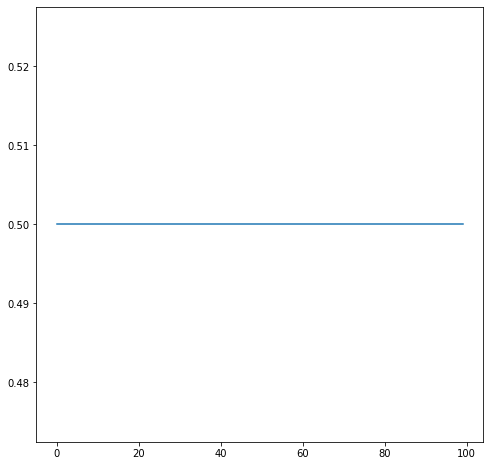

In [ ]:
# Определение набора данных
data = np.array([
    [57, 165],     # Алиса
    [78, 183],     # Боб
    [92, 190],     # Иван
    [52, 172],     # Марья
])


mean_weight = (92+78+57+52)/4

mean_height = (165+183+190+172)/4

#data = np.array([
#    [57-int(mean_weight), 165-int(mean_height)],     # Алиса
#    [78-int(mean_weight), 183-int(mean_height)],     # Боб
#    [92-int(mean_weight), 190-int(mean_height)],     # Иван
#    [52-int(mean_weight), 172-int(mean_height)],     # Марья
#])


#print(data)

all_y_trues = np.array([
    1, # Алиса
    0, # Боб
    0, # Иван
    1, # Марья
])

# Тренируем нашу нейронную сеть!
network = NeuralNetwork()
loss = network.train(data, all_y_trues)

plt.figure(figsize = (8, 8))
plt.plot(loss)
plt.show()

In [ ]:
w_name = np.array([55, 160])

w_name[0] = w_name[0] - mean_weight
w_name[1] = w_name[1] - mean_height

m_name = np.array([72, 190])

m_name[0] = m_name[0] - mean_weight
m_name[1] = m_name[1] - mean_height

print(f"Женщина: {network.feedforward(w_name)}")
print(f"Мужчина: {network.feedforward(m_name)}")

Женщина: 1.0
Мужчина: 1.0
